## 01 - How fast does the Ebola spread?

In the `data/ebola.txt` file there is a timeseries about a recent ebola outbreak for several countries.

- Let's plot the number of total deaths as the function of time.
- Try to fit an exponential function to the plotted curve! $$f(t,A,\beta)=A\mathrm{e}^{\beta t}$$   

- Estimate (extrapolate) from the curve what would have happened if the international and other organizations didn't help to prevent it! When would have humanity become extinct?

In [2]:
%pylab inline
from scipy.optimize import curve_fit 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [83]:
df = pd.read_csv('data/ebola.csv', header=11, sep=" ") # load data into a dataframe

In [84]:
df.head()

,#Day,GuinSus,GuinDeath,GuinLab,LibSus,LibDeath,LibLab,NigSus,NigDeath,NigLab,SLSus,SLDeath,SLLab,SenSus,SenDeath,SenLab
0,0,86,59,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,86,60,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,103,66,4,0,0,0,0,0,0,0,0,0,0,0,0
3,6,112,70,24,0,0,0,0,0,0,0,0,0,0,0,0
4,7,122,80,24,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
# Calculate the total number of deaths
# the simplest is to chose the #Day col as the index and the sum every 'Death' column
df = df.set_index("#Day")
df.head()

,GuinSus,GuinDeath,GuinLab,LibSus,LibDeath,LibLab,NigSus,NigDeath,NigLab,SLSus,SLDeath,SLLab,SenSus,SenDeath,SenLab
#Day,,,,,,,,,,,,,,,
0,86,59,0,0,0,0,0,0,0,0,0,0,0,0,0
1,86,60,1,0,0,0,0,0,0,0,0,0,0,0,0
2,103,66,4,0,0,0,0,0,0,0,0,0,0,0,0
6,112,70,24,0,0,0,0,0,0,0,0,0,0,0,0
7,122,80,24,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
#and sum them now
df['Total Deaths'] = df.loc[:,df.columns[1::3]].sum(axis=1)

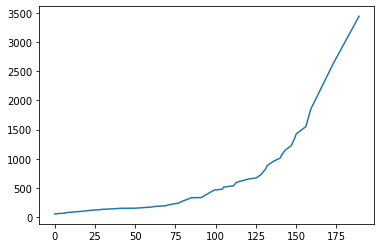

In [73]:
plot(df.index, df['Total Deaths'])

In [74]:
params,pcov=curve_fit(lambda x,A,alpha:A*exp(alpha*x),
                      df.index,  df['Total Deaths'], p0=[0.1,0.1])

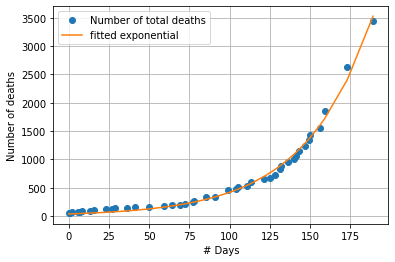

In [76]:
plot(df.index, df['Total Deaths'],'o',label='Number of total deaths')
plot(df.index, (lambda x,A,alpha:A*exp(alpha*x))(df.index,*params)
     ,'-',label='fitted exponential')
xlabel('# Days')
ylabel('Number of deaths')
legend(loc='upper left')
grid()

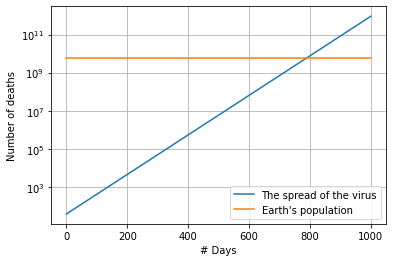

In [81]:
t2=linspace(0,1000,40)
semilogy(t2,
         (lambda x,A,alpha:A*exp(alpha*x))(t2,*params), label="The spread of the virus")
xlabel('# Days')
ylabel('Number of deaths')
semilogy(t2,6e9*t2**0, label="Earth's population")
legend(loc="lower right")
grid()

Approximately 800 days have to pass until the last human dies in ebola, assuming that nothing prevents it's spread and fatality rate etc...